# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).


In [82]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:      7.16.1 (need at least 1.0)
Numpy version:        1.18.5 (need at least 1.7.1)
SciPy version:         1.5.3 (need at least 0.12.0)
Pandas version:        1.0.5 (need at least 0.11.0)
Maplotlib version:     3.2.2 (need at least 1.2.1)
Scikit-Learn version: 0.23.2 (need at least 0.13.1)


### Working in a group? NA
List the names of other students with whom you worked on this problem set:


---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set]( https://archive.ics.uci.edu/ml/machine-learning-databases/housing/).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

You can read more about the dataset [here](http://lib.stat.cmu.edu/datasets/boston)

Use the following commands to load the dataset:


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [5]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to f

In [54]:
boston = pd.DataFrame(bdata.data)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
boston.columns = bdata.feature_names[:]
print(boston.shape)
boston.head()

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [42]:
bdata['target'].shape

(506,)

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [118]:
# enter your code here
boston['MEDV'] = bdata['target']
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [119]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [120]:
boston.count

<bound method DataFrame.count of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  2

In [112]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [113]:
Chas = boston.loc[boston['CHAS']==1]
Chas.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,35.000000,35.000000,35.000000,35.0,35.000000,35.000000,35.00000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000
mean,1.851670,7.714286,12.719143,1.0,0.593426,6.519600,77.50000,3.029709,9.314286,386.257143,17.491429,372.997429,11.241714,28.440000
std,2.494072,18.800143,5.957623,0.0,0.144736,0.876416,22.02134,1.254728,8.248962,165.012004,2.081766,53.382820,6.686651,11.816643
min,0.015010,0.000000,1.210000,1.0,0.401000,5.012000,24.80000,1.129600,1.000000,198.000000,13.600000,88.010000,1.920000,13.400000
25%,0.125060,0.000000,6.410000,1.0,0.489000,5.935500,60.30000,1.904700,4.000000,276.000000,15.650000,376.200000,5.395000,21.100000
50%,0.447910,0.000000,13.890000,1.0,0.550000,6.250000,88.50000,3.048000,5.000000,307.000000,17.600000,390.770000,10.500000,23.300000
75%,3.397665,0.000000,18.100000,1.0,0.693000,6.915000,93.20000,3.897300,8.000000,403.000000,18.600000,393.595000,15.070000,33.150000
max,8.982960,90.000000,19.580000,1.0,0.871000,8.780000,100.00000,5.885000,24.000000,666.000000,20.200000,396.900000,26.820000,50.000000


In [114]:
top_5_medv = boston.sort_values(['MEDV'], ascending= False).head(5)
top_5_medv[['TAX','MEDV']]

,TAX,MEDV
283,198.0,50.0
225,307.0,50.0
369,666.0,50.0
370,666.0,50.0
371,666.0,50.0


### *Provide our answers below:*

 - 1.1.1: 14 different variables,506 different observations 
 - 1.1.2: 35 neighborhoods where the tract bounds the Charles River.
 - 1.1.3: null values are all 0
 - 1.1.4: 198, 307, 666, 666, 666

### 1.2: Answer some basic questions
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood? (As far as ties are concerned, just use the top 5 values to break the ties)
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?


In [59]:
# enter your code here
boston['MEDV'] = bdata['target']
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [61]:
rooms = boston.loc[boston['RM'] < 3]
rooms

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV


In [66]:
lowest_medv = boston.sort_values(['MEDV'])
lowest_medv_riv = sort.loc[sort['CHAS'] == 1]
lowest_medv_riv.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
142,3.32105,0.0,19.58,1.0,0.871,5.403,100.0,1.3216,5.0,403.0,14.7,396.9,26.82,13.4


In [65]:
top_medv = boston.sort_values(['MEDV'], ascending= False).head(1)
top_medv[['CRIM']]

,CRIM
283,0.01501


In [68]:
lowest_medv[['CRIM']].head(1)

,CRIM
398,38.3518


*Provide our answers below:*

 - 1.2.1:  the median housing price in Boston's most expensive neighborhood is $50,000.
 - 1.2.2: 0 houses have on average less than 3 rooms per dwelling
 - 1.2.3: the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River 403.0	
 - 1.2.4: crime rate in the neighborhood with the highest median housing price is 0.01501
 - 1.2.5: crime rate in the neighborhood with the lowest median housing price is 38.3518

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [201]:
boston.agg({
    
    "MEDV" : ["name","count","mean", "std", "min","median",'max'],
    "CRIM" : ["name","count","mean", "std", "min","median",'max'],
    "ZN" : ["name","count","mean", "std", "min","median",'max'],
    "INDUS" : ["name","count","mean", "std", "min","median",'max'],
    "CHAS" : ["name","count","mean", "std", "min","median",'max'],
    "NOX" : ["name","count","mean", "std", "min","median",'max'],
    "RM" : ["name","count","mean", "std", "min","median",'max'],
    "AGE" : ["name","count","mean", "std", "min","median",'max'],
    "DIS" : ["name","count","mean", "std", "min","median",'max'],
    "RAD" : ["name","count","mean", "std", "min","median",'max'],
    "TAX" : ["name","count","mean", "std", "min","median",'max'],
    "PTRATIO" : ["name","count","mean", "std", "min","median",'max'],
    "B" : ["name","count","mean", "std", "min","median",'max'],
    "LSTAT" : ["name","count","mean", "std", "min","median",'max']
    
})

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
name,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506,506,506,506,506,506,506,506,506,506,506,506,506,506
mean,22.5328,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531
std,9.1971,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106
min,5,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73
median,21.2,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36
max,50,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River? Use a t-test to answer this question. Clearly state the null and alternative hypothesis for your test.

In [189]:
# enter your code here
val1 = boston.loc[boston['CHAS']==1][['MEDV']] #houses that are adjacent to the Charles River
val2 = boston.loc[boston['CHAS']==0][['MEDV']] #houses that are not adjacent to the Charles River

from scipy.stats import ttest_ind
ttest_ind(val1['MEDV'], val2['MEDV']) #run t-test

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

The t-value 3.996 is pretty high and with a significant p-value that are less than .05, therefore there's a significant difference between value 1 - houses that are adjacent to the Charles River and value 2 - houses that are not adjacent to Charles River. 

### 1.5 Simple Linear Regression

Estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Interpret the R2 value. Based on this evidence, can you conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [90]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()

#checking the shape and length of the values
x = boston['MEDV'].values
y = boston["LSTAT"].values
length = len(x)

506

In [229]:
#reshape the value in to length by 1 
x = x.reshape(length,1)
y = y.reshape(length, 1)

#run linear regression on x and y 
lr = regr.fit(x,y)
coe = lr.coef_
inter = lr.intercept_
print(coe, inter) #printing the coefficient and y-intercep 

[[-0.57275582]] [25.55885923]


In [210]:
print('r^2 is: ' + str(regr.score(x,y)))

r^2 is: 0.5441462975864797


In [241]:
import statsmodels.api as sm

reg = sm.OLS(y,x).fit()
print("the standard error is: " + str(reg.bse))

the standard error is: [0.01972371]


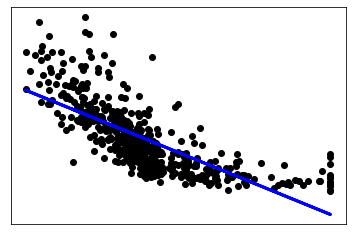

In [93]:
# plot the graph for visual check 
import matplotlib.pyplot as plt
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

There's a negative correlation between the % lower status of the population and the target median value of homes. 
The standard error in this correlation is: 0.0197; which is a pretty low S value that means the model fits data pretty well;
The R^2 is: 0.544, which indicates that the regression model explains more than half of the data. 


---

## Part 2: Histograms and Boxplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


Text(0.5, 0, "Median Housing Prices in $1000's")

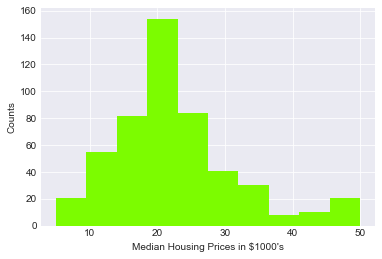

In [258]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt  

ax = plt.subplot(111)

# eChange the bin width on the histogram to be $1000

#Change the color of the bars to be green, and remove the borders from the bars
plt.hist(bdata.target, bins = 10, color = '#7CFC00')

#Remove the axes on the top and right side of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Add appropriate labels 
plt.ylabel('Counts')
plt.xlabel("Median Housing Prices in $1000's")

### 2.2: Boxplot of housing prices

Create a **horizontal** boxplot that shows the distribution of the median value of houses (y-axis) that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers. Properly label your axes, and make sure that your graphic looks polished and professional.

Text(0.5, 0, 'adjacent to Charles River')

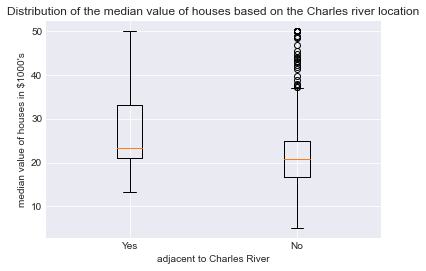

In [259]:
# enter your code here

plt_data_1 = boston.loc[boston['CHAS']== 1, 'MEDV'].values #houses adjacent to the Charles river
plt_data_2 = boston.loc[boston['CHAS']== 0, 'MEDV'].values #houses are not adjacent to the Charles river

plt.boxplot([plt_data_1, plt_data_2], labels= ['Yes', 'No']) #plot the horizontal boxplot

plt.title('Distribution of the median value of houses based on the Charles river location')
plt.ylabel("median value of houses in $1000's")
plt.xlabel("adjacent to Charles River")


### 2.3: Interpret

What do you observe in the above boxplots? Explain in terms of the various elements of the distribution. Does there appear to be a difference between distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river? 

1. the minimum media value of houses are almost $10,000 higher in the Charles River area versus those are not.
2. the median has a smaller difference comparing to the minimum. 
3. the maximum media value of houses adjacent to Charles river is much higher than those are not, almost 15,000 difference. However there are a number of outliers in the area that are not adjacent to the Charles river. 


### 2.4 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated?

In [160]:
# enter your code here
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'RAD', 'LSTAT', 'PTRATIO', 'B','MEDV'] #variables
matrix = boston[col].corr() #generate correlation matrix

In [163]:
matrix.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,RAD,LSTAT,PTRATIO,B,MEDV
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.178963,-0.055854,0.193333,0.081414,0.190798,-0.013762,0.173833,-0.146527,0.236150,0.235854,0.141277,0.116925,-0.060569,-0.068390
std,0.445117,0.487876,0.577203,0.277651,0.573518,0.449620,0.534476,0.552479,0.554964,0.523372,0.565327,0.425154,0.415799,0.528348
min,-0.388305,-0.569537,-0.708027,-0.121515,-0.769230,-0.613808,-0.747881,-0.769230,-0.534432,-0.494588,-0.737663,-0.507787,-0.444413,-0.737663
25%,-0.214552,-0.407666,-0.383001,-0.051121,-0.360585,-0.299653,-0.265217,-0.525073,-0.308934,-0.286423,-0.401268,-0.218699,-0.376560,-0.458232
50%,0.321340,-0.256209,0.394915,0.020710,0.304952,-0.214547,0.307125,-0.306070,0.483654,0.460382,0.414833,0.225224,-0.225459,-0.379290
75%,0.446959,0.277873,0.634534,0.090032,0.653878,0.185952,0.578368,0.238758,0.646708,0.607363,0.579158,0.380947,0.163657,0.312578
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


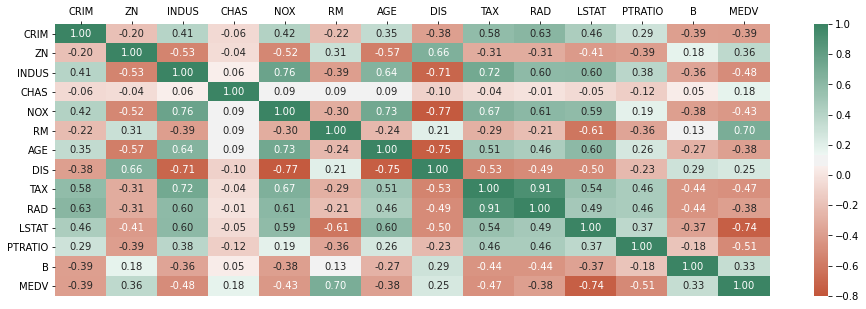

In [174]:
import seaborn as sns

cmap = sns.diverging_palette(20, 150, as_cmap=True) #setting color theme to red and green
plt.figure(figsize = (16,5)) #set figure size

ax = sns.heatmap(matrix, vmin = -0.8, vmax = 1, annot = True, fmt= '.2f', cmap=cmap) # generate heatmap with annotation and preferred color theme
ax.xaxis.tick_top() # move labels to the top


RAD (the accessibility to radial highways) and TAX(the property-tax rate) seems to be most positively correlated with a value of 0.91; 

DIS(weighted distance to employment centres) and NOX(nitric oxides concentration) seems to be most negatively correlated with a value of -0.77. 

### 2.5 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

In [271]:
# enter your code here
v1 = boston['MEDV'].values
v2 = boston['CRIM'].values
length = len(x)
v1

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

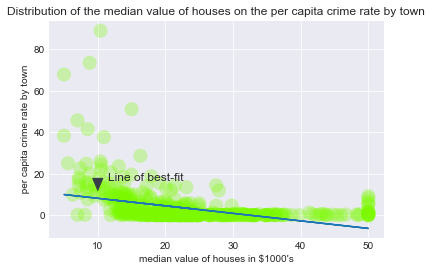

In [292]:
fig, ax = plt.subplots()

ax.scatter(v1, v2, c=color, s=200, label=color,
               alpha=0.3, edgecolors='none')


ax.grid(True)

#plot the line of best fit
m, b = np.polyfit(v1, v2, 1)
plt.plot(v1, m*v1 + b)

ax.annotate('Line of best-fit',
            xy=(10, 12),
            xycoords='data',
            xytext=(10,10),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)

plt.title('Distribution of the median value of houses on the per capita crime rate by town')
plt.xlabel("median value of houses in $1000's")
plt.ylabel(" per capita crime rate by town")
plt.show()